# COGS 108 - Group 007 - Fall 2019

# Overview

Network television is a multi-billion dollar industry characterized by its quick and consistent output of new content for its consumers. However, the quality of the shows produced, along with the subsequent reception from viewers, varies significantly between programs. The goal of our project is to analyze how the addition of an award-winning director, writer, or actor to a program influences its subsequent rating and reception from audiences to quantitatively determine if there’s a pattern associated with those jobs. By analyzing a database of all known American television programs and their ratings from IMBD and a kaggle dataset of emmy award winners, we can quantitatively determine which of those three positions, or combination thereof, has a bigger influence on ratings by determining which shows have higher ratings when “better” actors, directors, or screenwriters (those listed as as Emmy award winners) are involved with the project.

# Names
- Anthony Ngo
- Brianna Alderman
- Jan Hsiao
- Emily Pettitt
- Arman Shahriari-Dastjerdi
- Kelly Zhang

# Group Members IDs

- A13437284
- A13429272
- A14724201
- A14029268
- A15161500
- A13377635


# Research Question

Out of Emmy award-winning actors, directors, and screenwriters, which role or combination of roles has the most positive correlation with high user ratings on IMDB for television shows?

In other words, who contributes the most to making a good show, actors, directors, writers, or some combination out of the three?

Assuming that IMDB user ratings is a reliable guide to good TV, and that the number of Emmy nominations for cast/crew equates to the 'goodness' of the individual in their role.

The dependent variable that we will be investigating will be the IMDb user ratings, and our independent variable will be the eight different categories of nomination role combinations.

## Background and Prior Work

Actors, directors, and screenwriters all have a role to play in TV productions, and they all contribute to a positive watching experience, but which role has the potential for the biggest impact on making good tv? We want to know whether any individual role has a bigger impact on the watching experience. For example, a skilled screenwriter could potentially have more impact on the watching experience than a skilled actor. Or, a strong directing and acting combination may beat good writing. We evaluate the 'goodness' of each role by the quantity of Emmy nominations these individuals have recieved. We evaluate the 'goodness' of a show by the average IMDB user rating for each show. 

This project(1) analyzes movies and searches for relationships between various variables like genres and average rating. He uses a bar chart for his visualization on the relationship between ratings  and genre. This visualization is very clear and effective, inspiring us to  possibly use a bar chart for the visualization of our question as well. From his project he learned that dramas have the highest average ratings of all the genres and that the horror genre has the lowest average rating of all the genres.

In (2), it seems that actor salaries are declining and much less than directors and writers, with directors being the highest paid. In addition, the gap between the highest paid directors and writers compared to the lowest paid is getting bigger. Therefore, we reason that the individual roles actor, writer, and director might have different levels of impact.

For (3) the book talks about what the IMBD database is an how to use it. This helped inspire us to utilize the database for our project and comprehend its scope and limitations. It also discusses other ways data science can be used to understand big data in regards to media, which was helpful during our brainstorming phases.

References (include links):
- 1) https://www.linkedin.com/pulse/analyzing-imdb-movie-dataset-preetish-panda/
- 2) https://www.hollywoodreporter.com/news/hollywood-salaries-revealed-movie-stars-737321
- 3) https://link.springer.com/content/pdf/10.1007/978-3-319-09426-7.pdf


# Hypothesis

We believe that there will be a strong correlation between award-winning directors and high viewer ratings. We came to this conclusion because directors are often involved with most facets of the program, instead of just impacting one part of the final product. Due to this, a “better” director will have a bigger impact on the rating of the show than screenwriters and actors, who only contribute to one part of the program. In addition, we believe that there will be a positive correlation between award-winning directors and high ratings because award-winning directors are objectively better than those without awards and will likely create better media that will be more highly rated than their competitors.

# Dataset(s)

- Dataset Name: Primetime Emmy Awards, 1949-2017
- Link to the dataset:https://www.kaggle.com/pmagda/primetime-emmy-awards
- Number of observations:19239

This dataset is listed on Kaggle.com, compiled by user Paul Magda, and lists the category, the nominees, the winner, the network, and the award year for Primetime Emmy Awards from 1949 to 2017. We only considered TV shows from 1955, because before 1955 the Academy did not have awards for writing or directing.

- Dataset Name: IMDB Datasets
- Link to the dataset: https://www.imdb.com/interfaces/
- Number of observations: 68831

These datasets are from IMDB and contain the overall ratings of each TV show and show info, for example, cast and crew names and start year and end year. IMDB data is split into five datasets, linked by codes for each show and codes for cast/crew names.

- name.basics.tsv can tell us the literal names corresponding to the name codes used in the other IMDB datasets
- title.crew.tsv has a more complete list of directors and writers for each show
- title.principals.tsv has the principal actors involved in each show (lead actor and main supporting actors)
- title.ratings.tsv has the ratings and total number of votes for each show
- title.basics.tsv has the titleType and literal show name and the years the show aired

The process of merging all five imdb files is explained alongside our data cleaning process.

But, long story short, the data we want is strewn across five separate files from IMDB and one file from Kaggle. The Kaggle Emmy dataset will provide us with the titles of Emmy nominated shows for directing and writing, and names of nominated actors/actresses. We want to have the average imdb rating of all tv shows and whether the show was Emmy nominated for acting and/or directing and/or writing. We cross referenced the show titles and actor names from the Emmy nominations to our imdb data show info to match the correct show rating with the nomination combinations.

# Setup

In [1]:
# Imports
# 
# Note: these are all the imports you need for this assignment!
# Do not import any other functions / packages

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import re
import csv
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Data Cleaning

We want to know if actors, writers, or directors contribute more to making a good show. Since we are defining good shows as highly rated shows on IMDB, we want the overall average ratings for shows that have actors, writers, and directors. Shows that do not involve all three roles involved are not considered (reality TV, documentaries, and sports don't necessarily have actors or writers).

In [2]:
name_basics=pd.read_csv('name.basics.tsv',delimiter='\t')
title_ratings=pd.read_csv('title.ratings.tsv',delimiter='\t')
title_principals=pd.read_csv('title.principals.tsv',delimiter='\t')
title_crew=pd.read_csv('title.crew.tsv',delimiter='\t')
title_basics=pd.read_csv('title.basics.tsv',delimiter='\t', low_memory = False)

We aren't examining crew/cast career information, so those columns are dropped. Show runtime, genre, and whether it's 18+ isn't relevant to our question as well, so those are also dropped.

Since IMDB has info for movies and individual tv show episodes, we narrowed down our scope to just listings for tvMiniSeries, tvMovies and tvSeries. tvEpisode was not kept because those are listings for individual episodes. We were unable to extract useful data from episode ratings because episodes are not consistently rated.

The dataframe basicsAndRatings was created as the first merging of basic show info and ratings, which were on separate files. Then we dropped shows outside of 1955 ~ 2017. Though the first Emmy was in 1949, 1955 was the first year the Academy included awards for all three roles we are comparing here (acting, directing, and writing). Since shows before 1954 could still have 'good actors', directing and writing were not equally evaluated by the Academy and thus we will not be considering those years. As for our constraint on 2017, we are not looking for shows after 2017 because we are sourcing our Emmy nominations from the Kaggle dataset and the author for the dataset did not update the set after 2017. While this is a limitation of the Kaggle dataset, we decided against web crawling for 2018 and 2019 Emmy information out of practicality. Another reason for this constraint is that IMDB contains show listings for unaired shows, for example, if you were to look up 'The Witcher' on IMDB, it is listed as a 2019 show but will not air until Dec 20 and Emmys have already been awarded for the 2019 year.

In [3]:
# these categories do not concern our research question
name_basics_cleaned = name_basics.drop(["birthYear","deathYear","primaryProfession","knownForTitles"], axis=1)
title_basics.drop(["isAdult","runtimeMinutes","genres"], axis=1, inplace=True)

# drop rows that aren't titleType 'tvMiniSeries','tvMovie', or 'tvSeries'
title_basics.drop(title_basics[(title_basics['titleType'] != 'tvMiniSeries') 
                               & (title_basics['titleType'] != 'tvMovie') 
                               & (title_basics['titleType'] != 'tvSeries')].index, inplace=True)

# merge show ratings and basic info, which were on separate files
basicsAndRatings = pd.merge(title_basics, title_ratings, on = 'tconst')

# get rid of \N as null value in endYear and startYear and replace with numerical value for comparisons
basicsAndRatings.loc[basicsAndRatings['endYear'] == "\\N", 'endYear'] = 9999
basicsAndRatings.loc[basicsAndRatings['startYear'] == "\\N", 'startYear'] = 0
basicsAndRatings['endYear'] = pd.to_numeric(basicsAndRatings['endYear'])
basicsAndRatings['startYear'] = pd.to_numeric(basicsAndRatings['startYear'])

# trim shows that ended before 1955 or started after 2017
basicsAndRatings.drop(basicsAndRatings[basicsAndRatings['endYear'] < 1954].index, inplace=True)
basicsAndRatings.drop(basicsAndRatings[basicsAndRatings['startYear'] >= 2017].index, inplace=True)

basicsAndRatings

,tconst,titleType,primaryTitle,originalTitle,startYear,endYear,averageRating,numVotes
0,tt0029270,tvMovie,Much Ado About Nothing,Much Ado About Nothing,1937,9999,5.0,6
1,tt0038738,tvMovie,A Midsummer Night's Dream,A Midsummer Night's Dream,1946,9999,8.4,5
3,tt0039123,tvSeries,Kraft Theatre,Kraft Television Theatre,1947,1958,8.6,121
5,tt0039445,tvMovie,Hamlet Part 1,Hamlet Part 1,1947,9999,7.0,5
7,tt0040028,tvSeries,Talent Scouts,Talent Scouts,1948,1958,6.4,12
...,...,...,...,...,...,...,...,...
117633,tt9906432,tvSeries,Pizza Party Podcast,Pizza Party Podcast,2014,9999,6.2,11
117634,tt9906472,tvSeries,Music Video Sins,Music Video Sins,2015,9999,6.8,6
117636,tt9908574,tvSeries,Maika Barbero,Maika Barbero,2013,9999,1.0,7
117642,tt9910292,tvMiniSeries,Facebook Idióták,Facebook Idióták,2016,9999,7.4,5


Now we wanted to isolate the shows that have actors, directors, and writers by merging our basicsAndRatings dataframe with the title_principals* and title_crew** dataframes. (Since we can't consider which role is more impactful if we include shows where not all three roles are involved.)

We also wanted to know the literal names for actors for each show because Emmy nominations for acting are credited to the actors by name. We don't need to know the literal names for directors because Emmy nominations for directing and writing are credited by show title.

Therefore, in the process of isolating shows that involve acting, directing, and writing, we also saved a list of actor names and the show they worked on to match to the list of Emmy nominations for acting later on.

    * title_principals is the only dataset from imdb that tells us which shows had which actors/actresses

    ** though title_principals also tells us which shows had which directors/writers, it also includes many other roles like cinematographer, composer, and producer, while title_crew is more succinct and only tells us which directors and writers worked on what shows, therefore title_crew was chosen as the dataset source for directors and writers instead of title_principals

In [4]:
# preserve principals for our working shows
principals = pd.merge(title_principals, basicsAndRatings['tconst'], on = 'tconst') 
principals.drop(["job","characters","ordering"], axis=1, inplace=True)

# get rid of crew/cast except actors and actresses, then drop 'categories'
principals_actors = principals.drop(principals[(principals['category'] != 'actor') 
                                               & (principals['category'] != 'actress')].index)
principals_actors.drop(["category"], axis=1, inplace = True)

# add in literal names for actors
principals_actors = pd.merge(principals_actors, name_basics_cleaned, on = 'nconst')

# merge rows by tconst so each show corresponds to one or more actors
actors_rowMerged = principals_actors.groupby(
    ['tconst'])['nconst','primaryName'].agg(lambda x: ','.join(x.astype(str))).reset_index()
actors_rowMerged.columns = ['tconst','actor_nconst','actor_primaryName']

# add actor info to all show df
all_shows = pd.merge(basicsAndRatings, actors_rowMerged, on = 'tconst')

# preserve crew for our working shows
crew = pd.merge(title_crew, basicsAndRatings['tconst'], on = 'tconst')
# get rid of shows that don't have directors or writers
crew.drop(crew[(crew['directors']=='\\N')|(crew['writers'] == '\\N')].index, inplace=True)

# get director and writer info from title crew df
directors_decoded = pd.DataFrame(crew['directors'].str.split(',').tolist(), index = crew['tconst']).stack()
directors_decoded = directors_decoded.reset_index([0, 'tconst'])
directors_decoded.columns = ['tconst', 'nconst']
# grab literal names for directors
directors_decoded = pd.merge(directors_decoded, name_basics_cleaned, on = 'nconst')
directors_rowMerged = directors_decoded.groupby(
    ['tconst'])['nconst','primaryName'].agg(lambda x: ','.join(x.astype(str))).reset_index()
directors_rowMerged.columns = ['tconst','director_nconst','director_primaryName']

# add director info to all show df
all_shows = pd.merge(all_shows, directors_rowMerged, on = 'tconst')

# perform similar operations done to directors on writers
writers_decoded = pd.DataFrame(crew['writers'].str.split(',').tolist(), index = crew['tconst']).stack()
writers_decoded = writers_decoded.reset_index([0, 'tconst'])
writers_decoded.columns = ['tconst', 'nconst']
# grab literal names for writers
writers_decoded = pd.merge(writers_decoded, name_basics_cleaned, on = 'nconst')
writers_rowMerged = writers_decoded.groupby(
    ['tconst'])['nconst','primaryName'].agg(lambda x: ','.join(x.astype(str))).reset_index()
writers_rowMerged.columns = ['tconst','writer_nconst','writer_primaryName']

# add writer info to all show df
all_shows = pd.merge(all_shows, writers_rowMerged, on = 'tconst')

all_shows

,tconst,titleType,primaryTitle,originalTitle,startYear,endYear,averageRating,numVotes,actor_nconst,actor_primaryName,director_nconst,director_primaryName,writer_nconst,writer_primaryName
0,tt0029270,tvMovie,Much Ado About Nothing,Much Ado About Nothing,1937,9999,5.0,6,"nm0779540,nm0651791","Margaretta Scott,Henry Oscar",nm0641007,George More O'Ferrall,nm0000636,William Shakespeare
1,tt0038738,tvMovie,A Midsummer Night's Dream,A Midsummer Night's Dream,1946,9999,8.4,5,"nm2512480,nm0040644,nm0048526,nm0068458,nm0072...","Thomas Dance,Robert Atkins,Iris Baker,Peter Be...",nm0040644,Robert Atkins,nm0000636,William Shakespeare
2,tt0039123,tvSeries,Kraft Theatre,Kraft Television Theatre,1947,1958,8.6,121,"nm0453006,nm0853299,nm0181961,nm0550855,nm0870...","Richard Kiley,Vaughn Taylor,Valerie Cossart,E....","nm0334353,nm1802165,nm0242409,nm0390776,nm0177...","William A. Graham,Harry Herrmann,Richard Dunla...","nm0000636,nm1055756,nm0590316,nm0913670,nm0785...","William Shakespeare,Robert Howard Lindsay,A.A...."
3,tt0039445,tvMovie,Hamlet Part 1,Hamlet Part 1,1947,9999,7.0,5,"nm0126400,nm0789970,nm0712615,nm0391373","John Byron,Sebastian Shaw,Margaret Rawlings,W....",nm0010757,Basil Adams,"nm0000636,nm0641007,nm0010757","William Shakespeare,George More O'Ferrall,Basi..."
4,tt0040033,tvSeries,"Break the $250,000 Bank",Break the Bank,1948,1957,6.8,5,"nm0172872,nm0318089,nm0254347,nm0938060,nm0647692","Bud Collyer,Janice Gilbert,Win Elliot,Janice W...",nm0228208,Marshall Diskin,nm1257510,Joseph Nathan Kane
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68826,tt9847988,tvSeries,House Full,House Full,2008,2009,9.1,7,"nm1463818,nm5953484,nm3618107,nm6750604,nm3959...","Abul Hayat,Majnun Mijan,Mosharraf Karim,Hasan ...","nm5286141,nm6815208","Redoan Rony,Iftekhar Ahmed Fahmi","nm5286141,nm6815208","Redoan Rony,Iftekhar Ahmed Fahmi"
68827,tt9883806,tvMiniSeries,Hisseli harikalar kumpanyasi,Hisseli harikalar kumpanyasi,1981,9999,7.8,5,"nm0333117,nm0344346,nm0785040,nm0258673,nm0621...","Yüksel Gözen,Aysen Gruda,Nevra Serezli,Mehmet ...","nm0233800,nm6314209","Haldun Dormen,Oskay Alptürk",nm0233800,Haldun Dormen
68828,tt9899342,tvSeries,Flowering Heart,Flowering Heart,2016,9999,5.9,11,"nm2951482,nm6895141,nm6043188,nm10531484,nm105...","Samantha Moon,Sharon Kwon,Nancy Kim,Jacqueline...","nm5338878,nm2500877,nm7455272","Chan-Young Park,Shinji Ishihira,Woo-Jin Lee","nm8901116,nm10176711","Jong Il Choi,Tms Enterainment"
68829,tt9906472,tvSeries,Music Video Sins,Music Video Sins,2015,9999,6.8,6,nm6168641,Jeremy Scott,"nm6168642,nm6168641,nm10374390","Chris Atkinson,Jeremy Scott,Barrett Share","nm6168642,nm6168641,nm10374390","Chris Atkinson,Jeremy Scott,Barrett Share"


Clean emmy data:
We removed shows before 1955 from total list of Emmy nominees because before 1955 the Academy did not have awards for directing nor writing, therefore it would skew our data to include shows from those years.

A limitation of the Emmy dataset is that nominations for directing and writing are listed as the show title and not the name of the directors or writers, but for acting, the nominations are listed for the actors and actresses. This is dealt with after we finished cleaning Emmy data in the cell below.

Three dataframes (actors, directors, and writers) are generated in the cell below, a list of actor/actress names (gender ignored from then on), a list of shows that have been nominated for good directing, and a list of shows that have been nominated for good writing.

Another data frame is generated (df_emmy2) which only grabbed nominations for shows overall. In other words, df_emmy2 does not have nominations for individuals (acting, directing, writing,... etc) nor nominations for technical ability (lighting, makeup, costume,...etc). This separate dataframe comes into use in a later analysis.

In [5]:
df_emmy = pd.read_csv('emmy-awards2-1949-2017.csv')

#starting from 1955
for i in range(len(df_emmy)):
    if(df_emmy.loc[i,'year'] < 1955):
        df_emmy = df_emmy.drop(i)

df_emmy = df_emmy.reset_index(drop=True)
df_emmy2 = pd.DataFrame(df_emmy) 
# df_emmy2: separate emmy nom info for overall nomination and ratings comparison


actors = pd.DataFrame(columns = ['year','nominee'])
directors = pd.DataFrame(columns = ['year', 'nominee'])
writers = pd.DataFrame(columns = ['year', 'nominee'])

df_emmy = df_emmy.applymap(str)
for i in range(len(df_emmy)):
    
    if("Actor" in df_emmy.loc[i, 'category']):
        if(("Guest" in df_emmy.loc[i,'category'])==0):
        
            actor_name =  df_emmy.loc[i,'nominee']
            actor_name = actor_name.strip()
            actor_name = actor_name.lower()
            actors.loc[i] = [df_emmy.loc[i,'year'], actor_name]
    elif("Actress" in df_emmy.loc[i, 'category']):
        if(("Guest" in df_emmy.loc[i,'category'])==0):
            
            actress_name = df_emmy.loc[i,'nominee']
            actress_name = actress_name.strip()
            actress_name = actress_name.lower()
            actors.loc[i] = [df_emmy.loc[i,'year'], actress_name]
    elif("Writ" in df_emmy.loc[i,'category']):
        show_nameW = re.sub('-[^>]+"', '', df_emmy.loc[i,'nominee'])
        show_nameW = re.sub("[\(\[].*?[\)\]]", "", show_nameW)
        show_nameW = show_nameW.strip()
        show_nameW = show_nameW.lower()
        if((show_nameW in writers)==0):
            
            writers.loc[i] = [df_emmy.loc[i,'year'], show_nameW]
    elif("Direct" in df_emmy.loc[i,'category']):
        show_nameD = re.sub('-[^>]+"', '', df_emmy.loc[i,'nominee'])
        show_nameD = re.sub("[\(\[].*?[\)\]]", "", show_nameD)
        show_nameD = show_nameD.strip()
        show_nameD = show_nameD.lower()
        if((show_nameD in directors)==0):
            
            directors.loc[i] = [df_emmy.loc[i,'year'], show_nameD]

actors.drop_duplicates(subset=["year","nominee"],keep='first', inplace=True)
directors.drop_duplicates(subset=["year", "nominee"], keep = 'first',inplace = True)
writers.drop_duplicates(subset=["year","nominee"], keep = 'first', inplace = True)

actors = actors.reset_index(drop = True)
directors = directors.reset_index(drop= True)
writers = writers.reset_index(drop = True)


unknown = pd.DataFrame(columns = ['year', 'category', 'winner', 'nominee','detail'])
overall = pd.DataFrame(columns = ['year', 'category', 'winner', 'nominee','detail'])

for i in range (len(df_emmy2)):
    if(type(df_emmy2.loc[i, 'category'])==float):
        unknown.loc[i] = df_emmy2.loc[i]
        df_emmy2 = df_emmy2.drop(i)


# unknown.to_csv('unknown_category.tsv',sep='\t',index=False)
        

# df_emmy2: separate emmy nom info for overall nomination and ratings comparison
df_emmy2.drop(df_emmy2[(df_emmy2['category'].str.contains("Act"))
                       |(df_emmy2['category'].str.contains('Writ'))
                       |(df_emmy2['category'].str.contains('Direct'))
                       |(df_emmy2['category'].str.contains('Comedi'))
                       |(df_emmy2['category'].str.contains('Person'))
                       |(df_emmy2['category'].str.contains('Special Award'))
                       |(df_emmy2['category'].str.contains('Best Public Service'))
                       |(df_emmy2['category'].str.contains('Male'))
                       |(df_emmy2['category'].str.contains('Female'))
                       |(df_emmy2['category'].str.contains('Choreograph'))
                       |(df_emmy2['category'].str.contains('Governor'))
                       |(df_emmy2['category'].str.contains('Perform'))
                       |(df_emmy2['category'].str.contains('Guest'))
                       |(df_emmy2['category'].str.contains('Support'))
                       |(df_emmy2['category'].str.contains('Reporter'))
                       |(df_emmy2['category'].str.contains('Commentator'))
                       |(df_emmy2['category'].str.contains('Producer'))
                       |(df_emmy2['category'].str.contains('Narrator'))
                       |(df_emmy2['category'].str.contains('Camera'))
                       |(df_emmy2['category'].str.contains('Sound'))
                       |(df_emmy2['category'].str.contains('Makeup'))
                       |(df_emmy2['category'].str.contains('Visual'))
                       |(df_emmy2['category'].str.contains('Tech'))
                       |(df_emmy2['category'].str.contains('Art'))
                       |(df_emmy2['category'].str.contains('Casting'))
                       |(df_emmy2['category'].str.contains('Supervision'))
                       |(df_emmy2['category'].str.contains('Edit'))
                       |(df_emmy2['category'].str.contains('Cinematography'))
                       |(df_emmy2['category'].str.contains('Composition'))
                       |(df_emmy2['category'].str.contains('Electronic'))
                       |(df_emmy2['category'].str.contains('Photo'))
                       |(df_emmy2['category'].str.contains('Lyric'))
                       |(df_emmy2['category'].str.contains('Design'))
                       |(df_emmy2['category'].str.contains('Light'))
                       |(df_emmy2['category'].str.contains('Song'))
                       |(df_emmy2['category'].str.contains('Hair'))
                       |(df_emmy2['category'].str.contains('Visual'))
                       |(df_emmy2['category'].str.contains('Theme'))
                       |(df_emmy2['category'].str.contains('Main'))
                       |(df_emmy2['category'].str.contains('Compose'))
                       |(df_emmy2['category'].str.contains('Effect'))
                       |(df_emmy2['category'].str.contains('Host'))
                       |(df_emmy2['category'].str.contains('Contribution'))
                       |(df_emmy2['category'].str.contains('Musician'))
                       |(df_emmy2['category'].str.contains('Commentary'))
                       |(df_emmy2['category'].str.contains('Scor'))
                       |(df_emmy2['category'].str.contains('Costum'))
                       |(df_emmy2['category'].str.contains('Coord'))
                       |(df_emmy2['category'].str.contains('Individual'))].index, inplace=True)

In [6]:
df_emmy

,year,category,winner,nominee,detail
0,1955,Best Actor In A Single Performance,0,Frederic March,Best of Broadway
1,1955,Best Actor In A Single Performance,0,Thomas Mitchell,Ford Theatre
2,1955,Best Actor In A Single Performance,0,David Niven,Four Star Playhouse
3,1955,Best Actor In A Single Performance,0,Frank Lovejoy,Lux Video Theatre
4,1955,Best Actor In A Single Performance,0,Frederic March,Shower of Stars
...,...,...,...,...,...
18969,2017,"Outstanding Production Design For Variety, Non...",0,"Bill Nye Saves The World - ""Earth Is A Hot Mess""",Netflix
18970,2017,"Outstanding Production Design For Variety, Non...",0,"Drunk History - ""Hamilton""",Comedy Central
18971,2017,"Outstanding Production Design For Variety, Non...",0,"Portlandia - ""Fred's Cell Phone Company""",IFC
18972,2017,"Outstanding Production Design For Variety, Non...",1,"Saturday Night Live - ""Host: Alec Baldwin""",NBC


In [7]:
actors

,year,nominee
0,1955,frederic march
1,1955,thomas mitchell
2,1955,david niven
3,1955,frank lovejoy
4,1955,bob cummings
...,...,...
3240,2017,john michael higgins
3241,2017,mindy sterling
3242,2017,jane lynch
3243,2017,kelsey scott


In [8]:
directors

,year,nominee
0,1955,four star playhouse
1,1955,schlitz playhouse of stars
2,1955,shower of stars
3,1955,the adventures of ozzie and harriet
4,1955,the ray bolger show
...,...,...
2032,2017,carpool karaoke primetime special 2017
2033,2017,hairspray live!
2034,2017,america's got talent
2035,2017,so you think you can dance


In [9]:
writers

,year,nominee
0,1955,i love lucy
1,1955,make room for daddy
2,1955,mr. peepers
3,1955,the george gobel show
4,1955,the jack benny show
...,...,...
964,2017,13th
965,2017,amanda knox
966,2017,anthony bourdain parts unknown
967,2017,bill nye saves the world


To match show nominations to the shows, we made sure to put show names/actor names in lower case characters and removed additional information in parentheses/brackets in the Emmy dataset and the IMDB dataset.

The beauty of dealing with the IMDB data previously is that the 'tconst' code is a unique code for each show listing. For example, if you google search for '#Adulting', there are two shows with the same name. In all_shows, our dataframe derived from IMDB data, they are under separate listings differentiated by their 'tconst'.

The issue with our Emmy data is, let's say '#Adulting' was nominated for directing, how can we know which '#Adulting' the Academy meant? Since our Emmy dataset is separate and does not use codes like 'tconst' found in our IMDB data, we match by literal text first between our Emmy and IMDB datasets, then attempt to match the show by the year nominated.

Say show A_1, and show A_2 have the same name but aired in different years, then we can find out which show was nominated by checking for the year of nomination.

The downfall is, and also present in the case of '#Adulting', shows with the same name can also run in the same years. Then this second level of filtering will not be able to differentiate the two. This is something we are aware of, and hope that duplicate shows are not abundant enough to significantly affect our results.

In [10]:
# standardization
def standardize_entries(string):
    string = string.lower()
    string = string.strip()
    output = string
    return output

tobeMergedWith = pd.DataFrame(data = all_shows[['tconst','startYear','endYear','primaryTitle','originalTitle']])
tobeMergedWith["primaryTitle"] = tobeMergedWith["primaryTitle"].apply(standardize_entries)
tobeMergedWith["originalTitle"] = tobeMergedWith["originalTitle"].apply(standardize_entries)


# mapping shows w/ good actors from df w/ actor names and year nominated
actors_merge1 = pd.merge(principals_actors, tobeMergedWith, on = 'tconst')
actors_merge1 = actors_merge1.drop(['nconst','primaryTitle'], axis=1)

actors.columns=['yearNom','primaryName']

actors["primaryName"] = actors["primaryName"].apply(standardize_entries)
actors_merge1["primaryName"] = actors_merge1["primaryName"].apply(standardize_entries)

actors_merge2 = pd.merge(actors, actors_merge1, on = 'primaryName')

actors_merge2['yearNom'] = pd.to_numeric(actors_merge2['yearNom'])
actors_merge2['startYear'] = pd.to_numeric(actors_merge2['startYear'])
actors_merge2['endYear'] = pd.to_numeric(actors_merge2['endYear'])
act_dropoutofrange = actors_merge2.drop(actors_merge2[(actors_merge2['yearNom'] < actors_merge2['startYear']) 
                                                      | (actors_merge2['yearNom'] > actors_merge2['endYear'])].index)
act_dropoutofrange.drop_duplicates(subset ="tconst", keep = 'first', inplace = True)

actor_shows = pd.DataFrame(data = act_dropoutofrange['tconst'])

# mapping shows w/ good directors from df w/ show names and year nominated

directors["nominee"] = directors["nominee"].apply(standardize_entries)

directors.columns=['yearNom','primaryTitle']
dir_merge_primary = pd.merge(directors, tobeMergedWith, on = 'primaryTitle')
dir_merge_primary.drop(["originalTitle","primaryTitle"], axis=1, inplace=True)

directors.columns=['yearNom','originalTitle']
dir_merge_original = pd.merge(directors, tobeMergedWith, on = 'originalTitle')
dir_merge_original.drop(["originalTitle","primaryTitle"], axis=1, inplace=True)

dir_merge = pd.concat([dir_merge_original,dir_merge_primary]).drop_duplicates().reset_index(drop=True)

dir_merge['yearNom'] = pd.to_numeric(dir_merge['yearNom'])
dir_merge['startYear'] = pd.to_numeric(dir_merge['startYear'])
dir_merge['endYear'] = pd.to_numeric(dir_merge['endYear'])
dir_dropoutofrange = dir_merge.drop(dir_merge[(dir_merge['yearNom'] < dir_merge['startYear']) 
                                              | (dir_merge['yearNom'] > dir_merge['endYear'])].index)

director_shows = pd.DataFrame(data = dir_dropoutofrange['tconst'])

writers["nominee"] = writers["nominee"].apply(standardize_entries)

writers.columns=['yearNom','primaryTitle']
writer_merge_primary = pd.merge(writers, tobeMergedWith, on = 'primaryTitle')
writer_merge_primary.drop(["originalTitle","primaryTitle"], axis=1, inplace=True)

writers.columns=['yearNom','originalTitle']
writer_merge_original = pd.merge(writers, tobeMergedWith, on = 'originalTitle')
writer_merge_original.drop(["originalTitle","primaryTitle"], axis=1, inplace=True)

writer_merge = pd.concat([writer_merge_original,writer_merge_primary]).drop_duplicates().reset_index(drop=True)

writer_merge['yearNom'] = pd.to_numeric(writer_merge['yearNom'])
writer_merge['startYear'] = pd.to_numeric(writer_merge['startYear'])
writer_merge['endYear'] = pd.to_numeric(writer_merge['endYear'])
writer_dropoutofrange = writer_merge.drop(writer_merge[(writer_merge['yearNom'] < writer_merge['startYear']) 
                                                 | (writer_merge['yearNom'] > writer_merge['endYear'])].index)

writer_shows = pd.DataFrame(data = writer_dropoutofrange['tconst'])

convert to set

In [11]:
actor_shows = actor_shows['tconst'].tolist()
director_shows = director_shows['tconst'].tolist()
writer_shows = writer_shows['tconst'].tolist()
all_shows_primary = all_shows['tconst'].tolist()
# all_shows_original = all_shows['originalTitle'].tolist()

actor_shows = set(actor_shows)
director_shows = set(director_shows)
writer_shows = set(writer_shows)
all_shows_primary = set(all_shows_primary)
# all_shows_original = set(all_shows_original)


Because shows can win multiple combinations of awards for directing, writing and acting, we needed to find a way to classify the different categories so that each category is disjoint from each other. They can only be in 8 different categories, as there are three roles. We just put the show in the corresponding category that it belongs in, using a key 'tconst' that we got from an earlier data wrangling process.

In [12]:
def categorize_shows(shows):
    good_ADW, good_AD, good_AW, good_DW, good_A, good_W, good_D, bad = [],[],[],[],[],[],[],[]
    for i in shows:
        if i in actor_shows and i in director_shows and i in writer_shows:
            #put in all good category
            good_ADW.append(i)
        elif i in actor_shows and i in director_shows:
            #put in actor directory good category
            good_AD.append(i)
        elif i in actor_shows and i in writer_shows:
            #put in good actor writer category
            good_AW.append(i)
        elif i in director_shows and i in writer_shows:
            #put in director writer category
            good_DW.append(i)
        elif i in actor_shows:
            #put in actor category
            good_A.append(i)
        elif i in writer_shows:
            #put in writer category
            good_W.append(i)
        elif i in director_shows:
            #put in director shows
            good_D.append(i)
        else:
            #put in bad category
            bad.append(i)

    return good_ADW, good_AD,good_AW,good_DW,good_A,good_W,good_D,bad
good_ADW, good_AD, good_AW, good_DW, good_A, good_W, good_D, bad = categorize_shows(all_shows_primary)
ADW = ['ADW']*len(good_ADW)
AD = ['AD']*len(good_AD)
AW = ['AW']*len(good_AW)
DW = ['DW']*len(good_DW)
A = ['A']*len(good_A)
W = ['W']*len(good_W)
D = ['D']*len(good_D)
bADW = ['badADW']*len(bad)
ADW = list(zip(ADW,good_ADW))
AD = list(zip(AD,good_AD))
AW = list(zip(AW,good_AW))
DW = list(zip(DW,good_DW))
A = list(zip(A,good_A))
W = list(zip(W,good_W))
D = list(zip(D,good_D))
badADW = list(zip(bADW,bad)) 

listOfCategories = ADW + AD + AW + DW + A + W + D + badADW

df = pd.DataFrame(listOfCategories,columns=['categories','tconst'])
categorized_shows = pd.merge(df, all_shows, on = 'tconst')
categorized_shows

,categories,tconst,titleType,primaryTitle,originalTitle,startYear,endYear,averageRating,numVotes,actor_nconst,actor_primaryName,director_nconst,director_primaryName,writer_nconst,writer_primaryName
0,ADW,tt0094514,tvSeries,Murphy Brown,Murphy Brown,1988,2018,6.8,7955,"nm0005499,nm0005344,nm0179976,nm0453909,nm0000...","Lily Tomlin,Joe Regalbuto,Pat Corley,Charles K...","nm0723664,nm0446060,nm0706347,nm0049975,nm0296...","John Rich,Barnet Kellman,Alan Rafkin,Peter Bal...","nm1162904,nm0722730,nm0796182,nm0588897,nm0281...","Marilyn Anderson,Billy Riback,Korby Siamis,Mar..."
1,ADW,tt1796960,tvSeries,Homeland,Homeland,2011,9999,8.3,284648,"nm0000719,nm0001597,nm0000132,nm0827561,nm0507...","F. Murray Abraham,Mandy Patinkin,Claire Danes,...","nm0877427,nm0644397,nm0003733,nm0322128,nm0638...","Brad Turner,Michael Offer,Daniel Attias,Lesli ...","nm0355329,nm1949279,nm0304536,nm0330258,nm0423...","Barbara Hall,Ted Mann,Alex Gansa,Howard Gordon..."
2,ADW,tt0106273,tvMovie,And the Band Played On,And the Band Played On,1993,9999,7.8,8878,"nm0000257,nm0000872,nm0000546,nm0000882","Alan Alda,Patrick Bauchau,Matthew Modine,Natha...",nm0006854,Roger Spottiswoode,"nm0776068,nm0793530","Arnold Schulman,Randy Shilts"
3,ADW,tt0116835,tvMovie,The Late Shift,The Late Shift,1996,9999,6.9,2842,"nm0736263,nm0000870,nm0000837,nm0383422","Daniel Roebuck,Kathy Bates,Bob Balaban,John Mi...",nm0858525,Betty Thomas,"nm0000786,nm0141488","George Armitage,Bill Carter"
4,ADW,tt0228449,tvSeries,Jane Eyre,Jane Eyre,1956,9999,8.5,8,"nm0085254,nm0048939,nm0811376,nm0805363,nm0151...","Dorothy Black,Stanley Baker,Roger Snowdon,Daph...",nm1103141,Campbell Logan,"nm0111576,nm0198036,nm1522821","Charlotte Brontë,Ian Dallas,Constance Cox"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68826,badADW,tt4418210,tvMovie,"Klaním se, mesici","Klaním se, mesici",1989,9999,5.0,5,"nm0423222,nm0301726,nm0692950,nm0692986,nm0687231","Jirina Jirásková,Vera Galatíková,Simona Postle...",nm1186281,Svatava Simonová,nm1349002,Anna Jurásková
68827,badADW,tt5134214,tvSeries,El Caso. Crónica de sucesos,El Caso. Crónica de sucesos,2016,2016,7.2,204,"nm0147308,nm0347202,nm0308272,nm0845189,nm1577...","Fernando Cayo,Fernando Guillén Cuervo,Antonio ...","nm0580319,nm0704173,nm0708529","Iñaki Mercero,Javier Quintas,José Ramos Paíno","nm1000380,nm1210729,nm1210673,nm3345707,nm8002...","Joan Barbero,Olga Salvador,Mauricio Romero,Gua..."
68828,badADW,tt1303434,tvSeries,Magyarok az ürben,Magyarok az ürben,2008,9999,4.1,31,"nm0477583,nm1367209,nm0619524,nm0229054,nm0379...","Zoltán Kálmánczhelyi,Krisztián Jeges,Viktor Na...",nm0904928,Zsolt Végh,"nm1416593,nm0514386,nm3156496,nm2815840","Balázs Pataki,Gergely Litkai,András Kovács,Pet..."
68829,badADW,tt1200062,tvMovie,Hunkeler macht Sachen,Hunkeler macht Sachen,2008,9999,6.5,23,"nm0864892,nm0323526,nm0874834,nm1617217","Oliver Tobias,Mathias Gnädinger,Gilles Tschudi...",nm0279043,Markus Fischer,"nm0773836,nm2273761","Hansjörg Schneider,Dominik Bernet"


# Data Analysis & Results

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1b4ad22a50>,
      dtype=object)

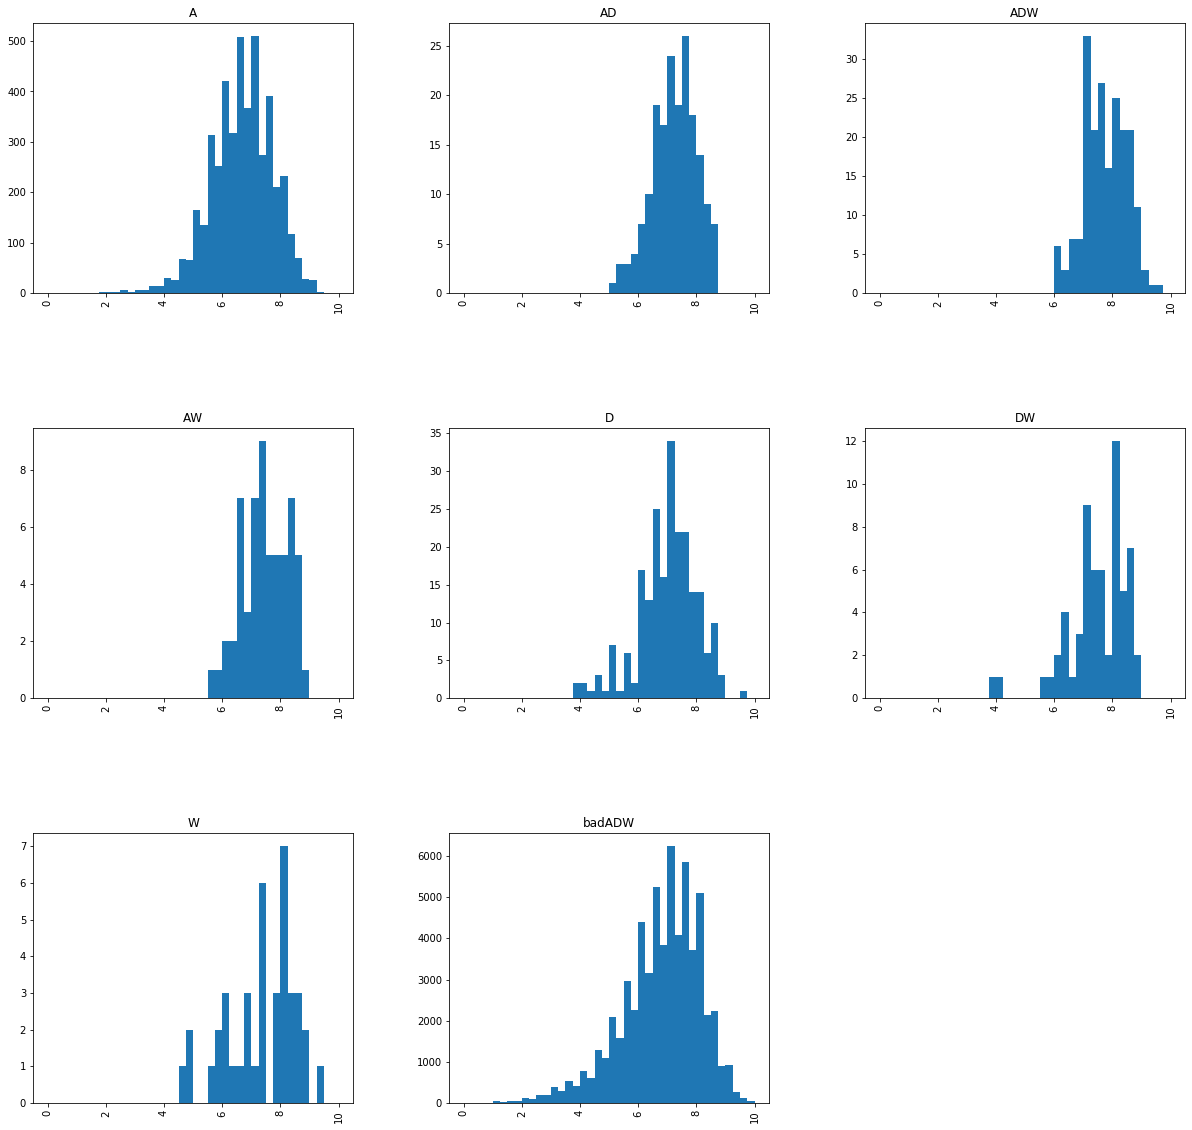

In [13]:
categorized_shows.hist(column = 'averageRating',by='categories', range = [0.0,10.0],bins = 40,figsize = (20,20))

Looking at the different histograms, we see that from the shows that only won an award in one category, actor's distribution of ratings looks normal, but writing and directing both have a skewed left distribution. There is also a higher variance in ratings in writing compared to the other two categories. The rest of the categories also have a skewed left distribution. In addition, the shows that did not win any award have the largest variance.

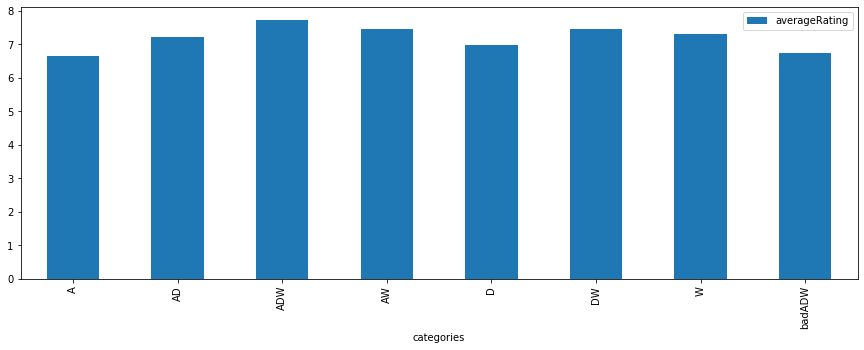

In [14]:
categorized_shows.groupby('categories').mean().plot.bar(y='averageRating',figsize = (15,5))

Looking at the bar plot of the average rating of movies out of 10, we see that out of the shows that only had one award for one of the three roles: actor, writer, and director, the movies that won an award for writing had the highest average rating. The lowest was actors. In comparing the categories with winners in two roles, shows that had both awards for director and writers had the highest rating, and the category with actor and director the lowest, but the ratings are pretty close among all categories. (.01 difference between the top two, and .24 difference between the first and the last.) It is also interesting to note that the shows that did not win any awards have a higher average rating than shows than shows that only won an award for acting, albeit it is a small .1 difference in rating.

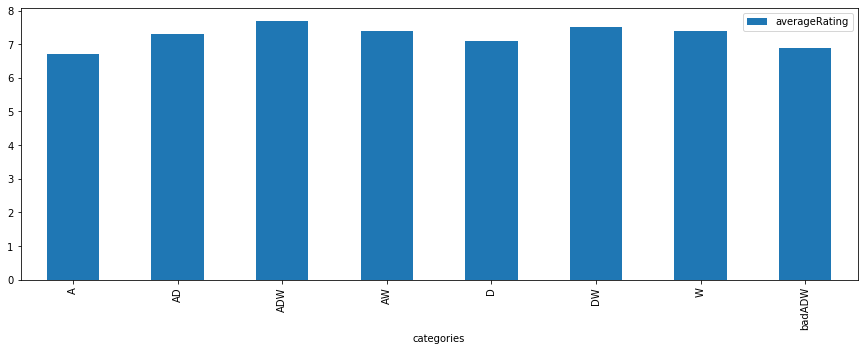

In [15]:
categorized_shows.groupby('categories').median().plot.bar(y='averageRating', figsize=(15,5))

We realised that the result of bar plot of the median movies' ratings out of 10 is same as the bar plot of the average rating of movies. We see that out of the shows with one award out of one of the three roles: actor, writer, and director, the tv series that won an award for writing had the highest average rating. The lowest was for movies that only recieved awards for best actors. In comparing the categories with winners in two roles, shows that had both awards for director and writers had the highest rating, and the category with actor and director the lowest, but the ratings are pretty close among all categories. (7.5, 7.4 and 7.3 respectively). It is also interesting to note that the shows that did not win any awards have a higher median rating than shows than shows that only won an award for acting, albeit it is a small .2 difference in rating.

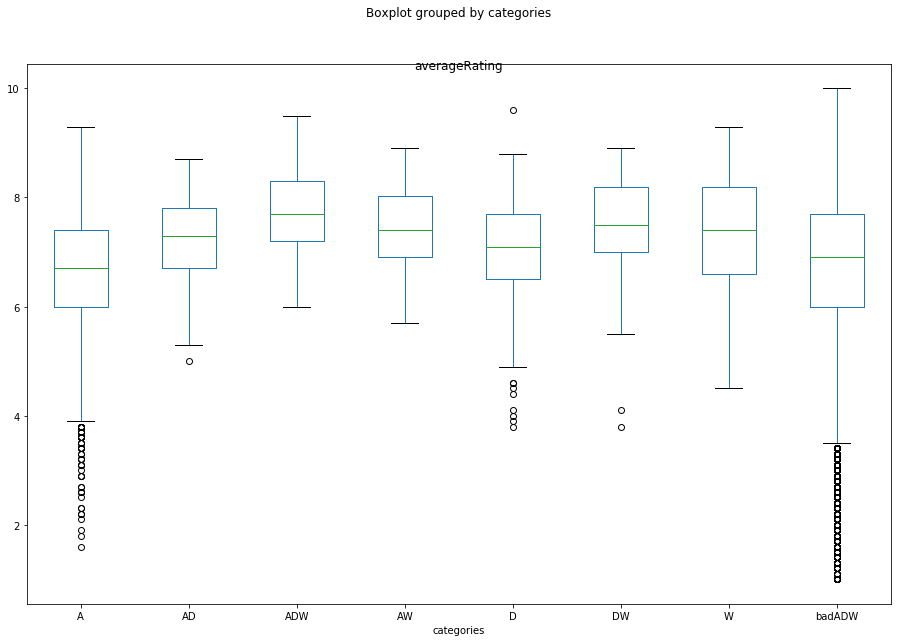

In [16]:
boxplot = categorized_shows.boxplot(by = 'categories', column = ['averageRating'], grid = False,figsize=(15,10))
ttl = boxplot.title
ttl.set_position([.5, .98])

In looking at this boxplot, we see that there are a lot of outliers in the category of shows that only won awards for acting and in the category that did not win any awards. In addition, writing has the largest interquartile range, showing its high variance. The rest have a similar distribution.

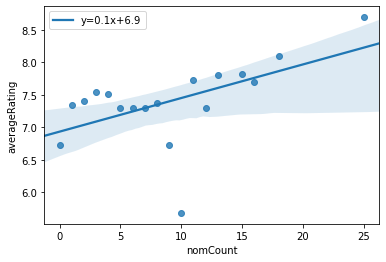

In [17]:
nom=pd.read_csv('overall_nominee.tsv',delimiter='\t')
nom.drop(["winner","detail"], axis=1,inplace=True)

# standardization
def standardize_nominee(string):
    string = string.lower()
    string = string.strip()
    string = re.sub('-[^>]+"', '', string)
    string = string.strip()
    string = re.sub("[\(\[].*?[\)\]]", "", string)
    string = string.strip()
    output = string
    return output

nom.drop(nom[(nom['nominee'].isna() == True)].index, inplace=True)
nom["nominee"] = nom["nominee"].apply(standardize_nominee)
nom.drop(["category"], axis=1, inplace=True)
nom.columns = ['yearNom','nominee']

nomVsRating = pd.DataFrame(basicsAndRatings[['tconst','averageRating','primaryTitle','originalTitle','startYear','endYear']])
nomVsRating["primaryTitle"] = nomVsRating["primaryTitle"].apply(standardize_entries)
nomVsRating["originalTitle"] = nomVsRating["originalTitle"].apply(standardize_entries)

nom.columns=['yearNom','primaryTitle']
nom_merge_primary = pd.merge(nom, nomVsRating, on = 'primaryTitle')
nom_merge_primary.drop(["originalTitle","primaryTitle"], axis=1, inplace=True)

nom.columns=['yearNom','originalTitle']
nom_merge_original = pd.merge(nom, nomVsRating, on = 'originalTitle')
nom_merge_original.drop(["originalTitle","primaryTitle"], axis=1, inplace=True)

nom_merge = pd.concat([nom_merge_original,nom_merge_primary]).drop_duplicates().reset_index(drop=True)

nom_merge['yearNom'] = pd.to_numeric(nom_merge['yearNom'])
nom_merge['startYear'] = pd.to_numeric(nom_merge['startYear'])
nom_merge['endYear'] = pd.to_numeric(nom_merge['endYear'])
nom_ratings = nom_merge.drop(nom_merge[(nom_merge['yearNom'] < nom_merge['startYear']) 
                                              | (nom_merge['yearNom'] > nom_merge['endYear'])].index)

nom_ratings.reset_index(inplace=True)
nom_ratings.drop(["startYear","yearNom","endYear"], axis=1,inplace=True)
nom_ratings = nom_ratings.groupby(
    ['tconst','averageRating'])['index'].agg(lambda x: ','.join(x.astype(str))).reset_index()
def count_repeat(string):
    string = string.split(',')
    output = len(string)
    return output
nom_ratings["index"] = nom_ratings["index"].apply(count_repeat)
nom_ratings.columns = ['tconst','averageRating','nomCount']
bana = pd.DataFrame(data = basicsAndRatings[['tconst','averageRating','numVotes']])
bana.columns = ['tconst','averageRating','nomCount']

s = set(nom_ratings['tconst'])

def dupe_check(tconst):
    if tconst in s:
        return -1
        print(tconst + ' -1')
    else:
        return 0
        print(tconst + '  0')

bana['nomCount'] = bana["tconst"].apply(dupe_check)
bana.drop(bana[(bana['nomCount'] < 0)].index,inplace=True)
nom_ratings_all = pd.concat([bana,nom_ratings]).drop_duplicates().reset_index(drop=True)
nom_ratings_avg = pd.DataFrame(nom_ratings_all[['averageRating','nomCount']])
nom_ratings_avg = nom_ratings_avg.groupby(
    ['nomCount'])['averageRating'].agg(lambda x: ','.join(x.astype(str))).reset_index()
def averageRating_mean(string):
    string = string.split(',')
    stringToNum = pd.to_numeric(string)
    output = np.mean(stringToNum)
    return output
nom_ratings_avg["averageRating"] = nom_ratings_avg["averageRating"].apply(averageRating_mean)
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(nom_ratings_avg['nomCount'],nom_ratings_avg['averageRating'])

# use line_kws to set line label for legend
ax = sns.regplot(x="nomCount", y="averageRating", data=nom_ratings_avg, 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

Here is where df_emmy2 from earlier comes into play. Our project assumes that Emmy nominations is a good indicator for the 'goodness' of individuals in each role, and that IMDB ratings are a good indicator for overall 'goodness' of a show; taking a step back, we want to know if having more Emmy nominations correlates to having a higher rating. We want Emmy nominations and IMDB user ratings to be positively correlated, because then we can argue that it shows that IMDB users and the Academy agree what even is 'good TV'.

A similar process to matching shows nominated for directing and writing to IMDB listings is performed first, but note that here we are not only considering shows that have all three roles, but any shows. That's why here we call back to basicsAndRatings, which still has shows within the range 1955-2017, matching the range for df_emmy2, but not all_shows which does not have shows that do not have all three roles (acting, directing, and writing).

After the amount of nominations for each show is counted from df_emmy2, it is merged with basicsAndRatings. Then the average rating for each nomination count is produced to visualize the relationship between Emmy noms and average ratings.

# Ethics & Privacy

The topic of ethics is widely defined as “moral principles that govern a person’s behavior or the conducting of an activity,” (Voytek, Lecture 3). For this project we collected data from various public datasets which include a dataset from Kaggle which was compiled by Paul Magda, a dataset that was compiled from IMDB API. According to IMDb’s dataset copyright license policy, there are no issues of privacy that we need to worry about because the purposes of our project fall under their guidelines of personal and non-commercial use, which we have complied with. In addition, as listed in their conditions of use document, contributors to IMDB must sign a compliance agreement for the conditions of use for their site which protects them from copyright infringement, but also details the terms of fair use whereby individuals are allowed to access and use the data as long as it is being used for personal, non-commercial use. Moreover, if this venture were to turn into more of a commercial endeavor, IMDb does list options for gaining their consent to utilize their content for non-personal commercial use by contacting their Licensing department. 

The data that we collected from these datasets is inherently biased due to the nature in which these shows are being rated. For the IMDb datasets the ratings themselves are quite biased by the users because the average ratings for each show are based on a weighted average of all of the individual user ratings. The number of votes for these shows are similarly biased by the users. The Kaggle dataset also contained many biases as these ratings came from Emmy data. The Emmy’s are biased due to the fact that the shows are evaluated by the academy. The categories for the Emmy’s also recently shifted so that there are more categories that individuals are being nominated for, therefore our data will be skewed towards the more recent years.


# Conclusion & Discussion

While actors, directors, and screenwriters all have important roles to play in the production of a television program or series, we aim to determine which job has the biggest impact on the viewer’s experience and their subsequent rating of the media. From the visualizations, it follows that actors alone do not play a large role in the ratings as the average and median of the average ratings of shows were lower than the shows with award-winning actors than of those that won no nominations at all. Writing seems to have the highest impact, but also the largest variance in impact. Directors were only slightly behind writers in strength of correlation, and had less of a variance. Thus, we believe that while writers have the biggest impact, having a good director on board as well is better because there is less variance, even if the expected rating is very slightly lower.

Limitations:

We tried our best to account for duplicate shows, but we could not account for duplicate shows with the same show title and aired in the same years. This affects our matching process between our Emmy dataset and our IMDB dataset. Show titles are also listed with the specific episode nominated in parenthesis sometimes. We also removed parts of the show title strings in any kind of quotation, parentheses, or brackets and set show title strings to lower case to prevent mismatches resulting from that.

Another limitation would be the quality of IMDB user ratings. While here we assume that IMDB user ratings are a good indicator of the 'goodness' of a tv show, we are also aware that marketing strategies include spamming online rating sites to boost a show's rating. This could have affected our results as well due to the biases that come from user ratings.

Yet another limitation would be that Emmy awards categories change every few years, and their categories have been increasing. Modern shows may be overrepresented as a result.

A saving grace for the last two limitations would be that we found a positive correlation between Emmy nominations and IMDB ratings. Meaning that we can at least argue that the two platforms seem to agree on what makes 'good TV'.

The impact of this project is an objective look at some of the factors influence a better television program. With this or similar projects as a starting point, consumers can understand these factors and make better decisions regarding what programs they invest their time in or what projects they invest their money in. From this we have learned to first consider award-winning writers and director's projects when deciding what programs to consume.
